In [ ]:
# https://www.kaggle.com/neuromusic/avocado-prices?select=avocado.csv

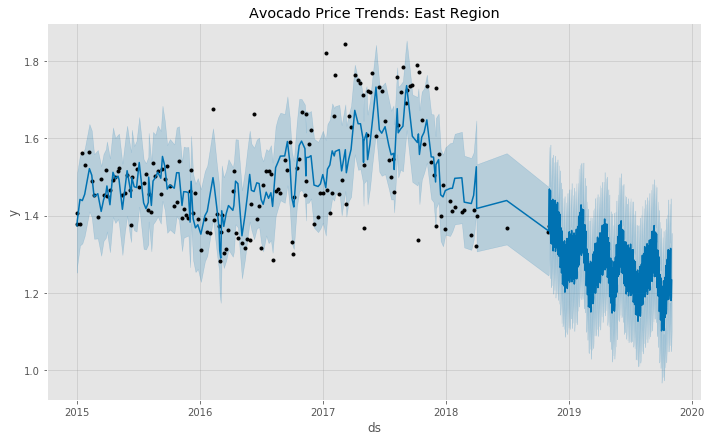

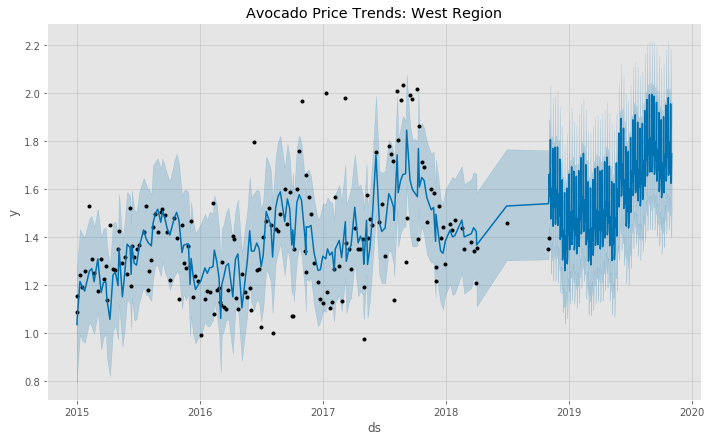

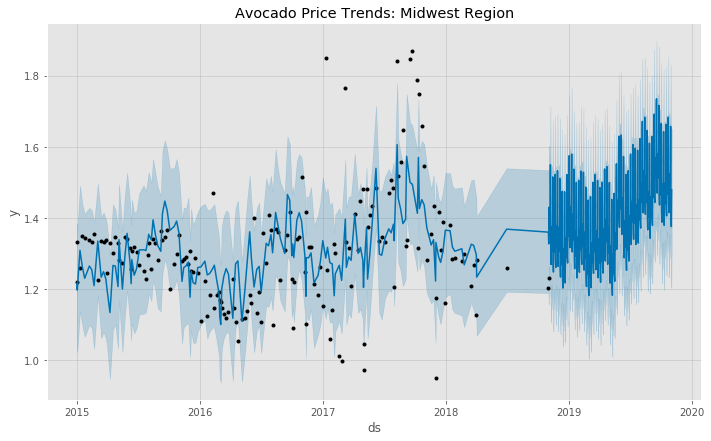

In [253]:
fig1_east = model_east.plot(forecast_east,uncertainty=True)
plt.title("Avocado Price Trends: East Region")

fig1_west = model_west.plot(forecast_west,uncertainty=True)
plt.title("Avocado Price Trends: West Region")

fig1_midwest = model_midwest.plot(forecast_midwest,uncertainty=True)
plt.title("Avocado Price Trends: Midwest Region")


plt.show()

In [255]:
"""Based on the forecasted trends of the three regions in the United States, prices are anticipated to rise in the West and Midwest but
fall in the East in 2019.""".replace("\n","")

'Based on the forecasted trends of the three regions in the United States, prices are anticipated to rise in the West and Midwest butfall in the East in 2019.'

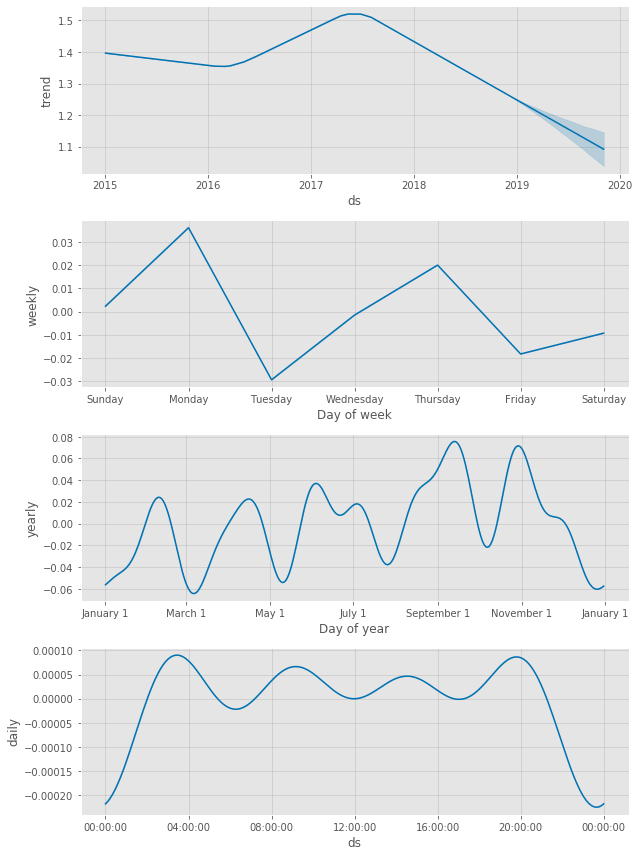

In [249]:
fig2_east = model.plot_components(forecast_east)

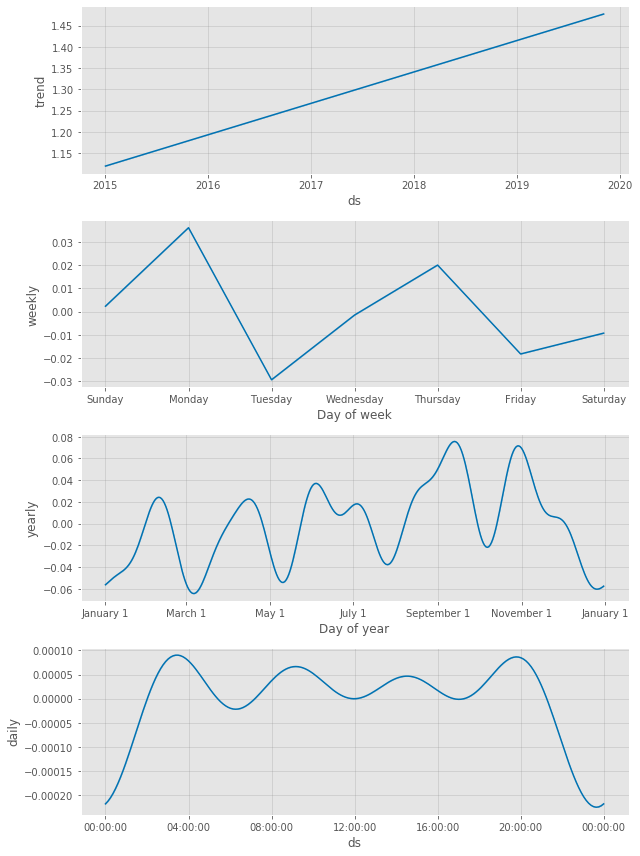

In [250]:
fig2_west = model.plot_components(forecast_west)

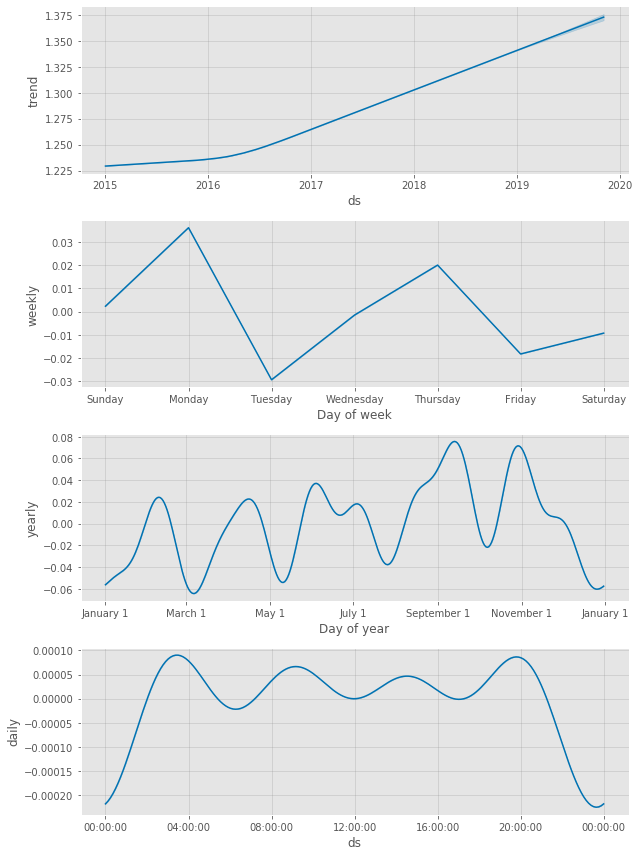

In [256]:
fig2_midwest = model.plot_components(forecast_midwest)

In [257]:
"""The above graphs are a break down by region of the seasonality of the East, West, and Midwest. Overall, the prices of avocados appear to behave the same or each region when broken down by days of the week, time of year, and time of day. Each region shows that prices of avocados are highest on Mondays and Thursdays during the week. They also show that prices of avocados slowly rise starting in May and grow up until September before dipping down and then rising again in November and then once again falling heading into December. Further research into holiday seasonality effect could be explored to see why this is the case. However, one area where there is great difference is the overall trend of avocado prices. While the West and Midwest show and upward trend in 2019, the East shows a sharp decline in the prices of avocados in 2019""".replace("\n","")

'The above graphs are a break down by region of the seasonality of the East, West, and Midwest. Overall, the prices of avocados appear to behave the same or each region when broken down by days of the week, time of year, and time of day. Each region shows that prices of avocados are highest on Mondays and Thursdays during the week. They also show that prices of avocados slowly rise starting in May and grow up until September before dipping down and then rising again in November and then once again falling heading into December. Further research into holiday seasonality effect could be explored to see why this is the case. However, one area where there is great difference is the overall trend of avocado prices. While the West and Midwest show and upward trend in 2019, the East shows a sharp decline in the prices of avocados in 2019'

# Load Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Data Viz
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [2]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

# Evaluation & CV Libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [3]:
from fbprophet import Prophet
import fbprophet

Importing plotly failed. Interactive plots will not work.


# Functions Used

In [ ]:
def area_selection(dataframe, area):
    
    dataframe = dataframe[dataframe['area'] == area]
    
    
    return dataframe.rename(columns={"Date":"ds","AveragePrice":"y"})

In [4]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def boxPlotter(DataFrame, ColumnName):
    # Plots boxplots for column given as parameter.    
    sns.catplot(x="Potability", y=ColumnName, data=DataFrame, kind="box")

In [5]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def distributionPlot(DataFrame):
     # Creates distribution plot.
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(DataFrame.columns[:-1])), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(DataFrame.columns)/3), 3, i+1)
        sns.distplot(
            DataFrame.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

# Load Data

In [10]:
# source:https://www.kaggle.com/neuromusic/avocado-prices?select=avocado.csv
avocado_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Avacado_Sales/avocado_sales_ed.csv')
avocado_data

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,type,year,region,area
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,East
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,East
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,East
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,East
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,New Mexico,West
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,New Mexico,West
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,New Mexico,West
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,New Mexico,West


In [8]:
print("Rows:", avocado_data.shape[0])
print("Columns:", avocado_data.shape[1])

Rows: 18249
Columns: 14


# Data Exploration

In [15]:
avocado_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 6039 to 1836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total_Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total_Bags    18249 non-null  float64
 7   Small_Bags    18249 non-null  float64
 8   Large_Bags    18249 non-null  float64
 9   Xlarge_Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  area          18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
"""I will have to convert the Date Object to a date type in order to under analysis on anything using date as the base"""

'I will have to convert the Date Object to a date type in order to under analysis on anything using date as the base'

In [17]:
import datetime as dt
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'],dayfirst=True)
avocado_data.info() # successfully conerted Date from an Object data type to a datetime64 data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 6039 to 1836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total_Volume  18249 non-null  float64       
 3   PLU_4046      18249 non-null  float64       
 4   PLU_4225      18249 non-null  float64       
 5   PLU_4770      18249 non-null  float64       
 6   Total_Bags    18249 non-null  float64       
 7   Small_Bags    18249 non-null  float64       
 8   Large_Bags    18249 non-null  float64       
 9   Xlarge_Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  area          18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 2.1+ MB


In [20]:
avocado_data = avocado_data.assign(year=avocado_data.Date.dt.year,
               month=avocado_data.Date.dt.month,
               day=avocado_data.Date.dt.day)
avocado_data.sort_values('Date', inplace=True)
avocado_data.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,type,year,region,area,month,day
11669,2015-01-02,1.93,2688.02,912.08,1425.94,0.00,350.00,350.00,0.00,0.0,organic,2015,St. Louis,MidWest,1,2
9693,2015-01-02,1.63,4215.96,432.24,2985.02,0.00,798.70,223.33,575.37,0.0,organic,2015,Columbus,MidWest,1,2
10993,2015-01-02,1.67,30193.16,3904.24,14499.51,32.15,11757.26,9989.22,1768.04,0.0,organic,2015,Plains,MidWest,1,2
2127,2015-01-02,1.04,771974.90,287292.15,429601.75,15342.47,39738.53,39738.53,0.00,0.0,conventional,2015,Sacramento,West,1,2
9589,2015-01-02,1.52,14391.05,1363.35,11835.47,0.00,1192.23,1192.23,0.00,0.0,organic,2015,Chicago,MidWest,1,2


In [21]:
avocado_data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [22]:
avocado_data.isnull().sum() # this data set is clean and does not contain any missing values 

Date            0
AveragePrice    0
Total_Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
Xlarge_Bags     0
type            0
year            0
region          0
area            0
month           0
day             0
dtype: int64

In [23]:
avocado_data.describe()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Data Visualization

In [24]:
# Below I will build graphs that break down avacado prices by year

In [25]:
avocado_data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [26]:
avocado_sales_2015 = avocado_data[avocado_data['year'] == 2015]
avocado_sales_2016 = avocado_data[avocado_data['year'] == 2016]
avocado_sales_2017 = avocado_data[avocado_data['year'] == 2017]
avocado_sales_2018 = avocado_data[avocado_data['year'] == 2018]

In [27]:
avocado_sales_2015.sort_values("Date", inplace=True)
avocado_sales_2016.sort_values("Date", inplace=True)
avocado_sales_2017.sort_values("Date", inplace=True)
avocado_sales_2018.sort_values("Date", inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A v

In [28]:
avocado_sales_2015_price = avocado_sales_2015[['month','AveragePrice','PLU_4046', 'PLU_4225','PLU_4770','type']]
avocado_sales_2015_price = avocado_sales_2015_price.groupby('month').mean()

avocado_sales_2016_price = avocado_sales_2016[['month','AveragePrice','PLU_4046', 'PLU_4225','PLU_4770','type']]
avocado_sales_2016_price = avocado_sales_2016_price.groupby('month').mean()

avocado_sales_2017_price = avocado_sales_2017[['month','AveragePrice','PLU_4046', 'PLU_4225','PLU_4770','type']]
avocado_sales_2017_price = avocado_sales_2017_price.groupby('month').mean()

avocado_sales_2018_price = avocado_sales_2018[['month','AveragePrice','PLU_4046', 'PLU_4225','PLU_4770','type']]
avocado_sales_2018_price = avocado_sales_2018_price.groupby('month').mean()

In [29]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,5)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        }

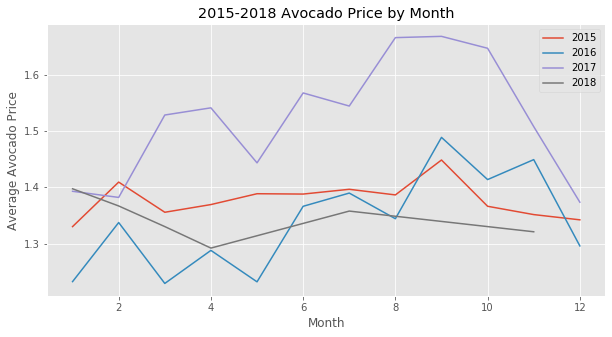

In [30]:
avocado_sales_2015_price['AveragePrice'].plot(label='2015')
avocado_sales_2016_price['AveragePrice'].plot(label='2016')
avocado_sales_2017_price['AveragePrice'].plot(label='2017')
avocado_sales_2018_price['AveragePrice'].plot(label='2018')


plt.title("2015-2018 Avocado Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Avocado Price")
plt.legend()



plt.grid(True)
plt.show()

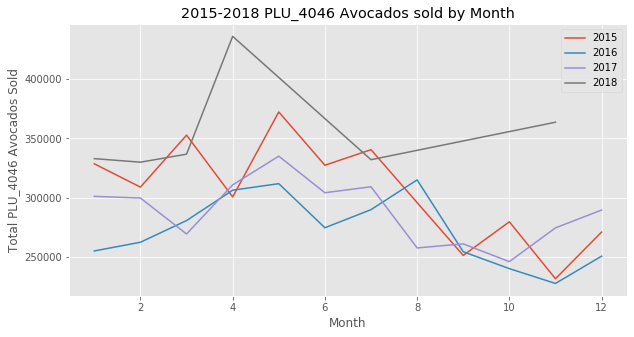

In [31]:
avocado_sales_2015_price['PLU_4046'].plot(label='2015')
avocado_sales_2016_price['PLU_4046'].plot(label='2016')
avocado_sales_2017_price['PLU_4046'].plot(label='2017')
avocado_sales_2018_price['PLU_4046'].plot(label='2018')


plt.title("2015-2018 PLU_4046 Avocados sold by Month")
plt.xlabel("Month")
plt.ylabel("Total PLU_4046 Avocados Sold")
plt.legend()



plt.grid(True)
plt.show()

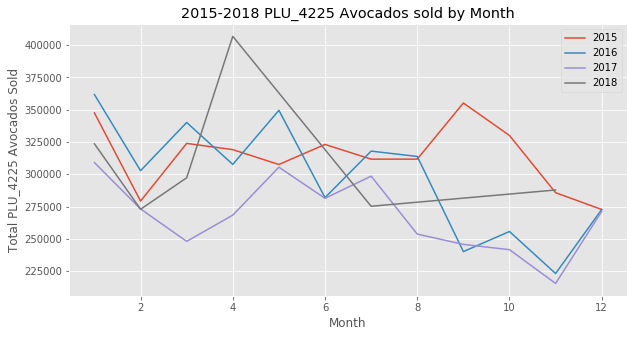

In [32]:
avocado_sales_2015_price['PLU_4225'].plot(label='2015')
avocado_sales_2016_price['PLU_4225'].plot(label='2016')
avocado_sales_2017_price['PLU_4225'].plot(label='2017')
avocado_sales_2018_price['PLU_4225'].plot(label='2018')



plt.title("2015-2018 PLU_4225 Avocados sold by Month")
plt.xlabel("Month")
plt.ylabel("Total PLU_4225 Avocados Sold")
plt.legend()



plt.grid(True)
plt.show()

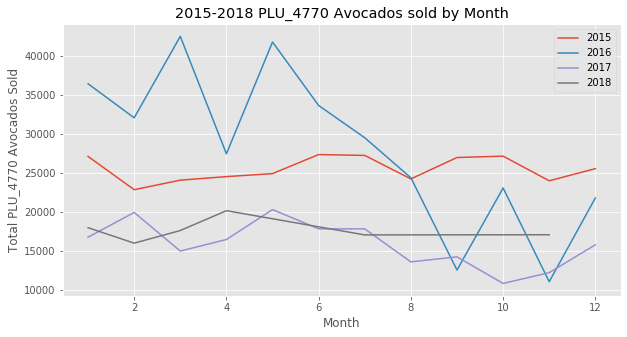

In [33]:
avocado_sales_2015_price['PLU_4770'].plot(label='2015')
avocado_sales_2016_price['PLU_4770'].plot(label='2016')
avocado_sales_2017_price['PLU_4770'].plot(label='2017')
avocado_sales_2018_price['PLU_4770'].plot(label='2018')



plt.title("2015-2018 PLU_4770 Avocados sold by Month")
plt.xlabel("Month")
plt.ylabel("Total PLU_4770 Avocados Sold")
plt.legend()


plt.grid(True)
plt.show()

# Predicting the Price of Avocados based on past 7 days

### Feature Engineering

In [38]:
avocado_data = avocado_data.copy()
avocado_data['AveragePrice_PerChange'] = avocado_data.AveragePrice.pct_change()
avocado_data['AveragePrice_Diff'] = avocado_data.AveragePrice.diff()

avocado_data['Total_Volume_PerChange'] = avocado_data.Total_Volume.pct_change()
avocado_data['Total_Volume_Diff'] = avocado_data.Total_Volume.diff()

avocado_data['PLU_4046_PerChange'] = avocado_data.PLU_4046.pct_change()
avocado_data['PLU_4046_Diff'] = avocado_data.PLU_4046.diff()

avocado_data['PLU_4225_PerChange'] = avocado_data.PLU_4225.pct_change()
avocado_data['PLU_4225_Diff'] = avocado_data.PLU_4225.diff()

avocado_data['PLU_4770_PerChange'] = avocado_data.PLU_4770.pct_change()
avocado_data['PLU_4770_Diff'] = avocado_data.PLU_4770.diff()

avocado_data['Total_Bags_PerChange'] = avocado_data.Total_Bags.pct_change()
avocado_data['Total_Bags_Diff'] = avocado_data.Total_Bags.diff()

avocado_data['Small_Bags_PerChange'] = avocado_data.Small_Bags.pct_change()
avocado_data['Small_Bags_Diff'] = avocado_data.Small_Bags.diff()

avocado_data['Large_Bags_PerChange'] = avocado_data.Large_Bags.pct_change()
avocado_data['Large_Bags_Diff'] = avocado_data.Large_Bags.diff()

avocado_data['Xlarge_Bags_PerChange'] = avocado_data.Xlarge_Bags.pct_change()
avocado_data['Xlarge_Bags_Diff'] = avocado_data.Xlarge_Bags.diff()

avocado_data.drop(['region'], axis = 1, inplace=True)
avocado_data.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,...,PLU_4770_PerChange,PLU_4770_Diff,Total_Bags_PerChange,Total_Bags_Diff,Small_Bags_PerChange,Small_Bags_Diff,Large_Bags_PerChange,Large_Bags_Diff,Xlarge_Bags_PerChange,Xlarge_Bags_Diff
11669,2015-01-02,1.93,2688.02,912.08,1425.94,0.00,350.00,350.00,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1607,2015-01-02,1.06,412752.74,4353.96,361694.45,34.23,46670.10,46576.76,93.34,0.0,...,inf,34.23,132.343143,46320.10,132.076457,46226.76,inf,93.34,NaN,0.0
1763,2015-01-02,0.56,1544750.92,1194635.06,261342.47,6335.66,82437.73,82437.73,0.00,0.0,...,184.090856,6301.43,0.766393,35767.63,0.769933,35860.97,-1.0,-93.34,NaN,0.0
775,2015-01-02,0.94,309471.69,1621.68,240215.65,19211.54,48422.82,43899.75,4377.27,145.8,...,2.032287,12875.88,-0.412613,-34014.91,-0.467480,-38537.98,inf,4377.27,inf,145.8
9433,2015-01-02,1.55,2808.55,18.78,102.35,0.00,2687.42,2687.42,0.00,0.0,...,-1.000000,-19211.54,-0.944501,-45735.40,-0.938783,-41212.33,-1.0,-4377.27,-1.0,-145.8


In [39]:
avocado_data.isnull().sum()

Date                         0
AveragePrice                 0
Total_Volume                 0
PLU_4046                     0
PLU_4225                     0
PLU_4770                     0
Total_Bags                   0
Small_Bags                   0
Large_Bags                   0
Xlarge_Bags                  0
type                         0
year                         0
area                         0
month                        0
day                          0
AveragePrice_PerChange       1
AveragePrice_Diff            1
Total_Volume_PerChange       1
Total_Volume_Diff            1
PLU_4046_PerChange           4
PLU_4046_Diff                1
PLU_4225_PerChange           1
PLU_4225_Diff                1
PLU_4770_PerChange        1631
PLU_4770_Diff                1
Total_Bags_PerChange         2
Total_Bags_Diff              1
Small_Bags_PerChange         5
Small_Bags_Diff              1
Large_Bags_PerChange       385
Large_Bags_Diff              1
Xlarge_Bags_PerChange     8171
Xlarge_B

In [40]:
for i in avocado_data:
    avocado_data[i] = avocado_data[i].fillna(0)
avocado_data.isnull().sum()

Date                      0
AveragePrice              0
Total_Volume              0
PLU_4046                  0
PLU_4225                  0
PLU_4770                  0
Total_Bags                0
Small_Bags                0
Large_Bags                0
Xlarge_Bags               0
type                      0
year                      0
area                      0
month                     0
day                       0
AveragePrice_PerChange    0
AveragePrice_Diff         0
Total_Volume_PerChange    0
Total_Volume_Diff         0
PLU_4046_PerChange        0
PLU_4046_Diff             0
PLU_4225_PerChange        0
PLU_4225_Diff             0
PLU_4770_PerChange        0
PLU_4770_Diff             0
Total_Bags_PerChange      0
Total_Bags_Diff           0
Small_Bags_PerChange      0
Small_Bags_Diff           0
Large_Bags_PerChange      0
Large_Bags_Diff           0
Xlarge_Bags_PerChange     0
Xlarge_Bags_Diff          0
dtype: int64

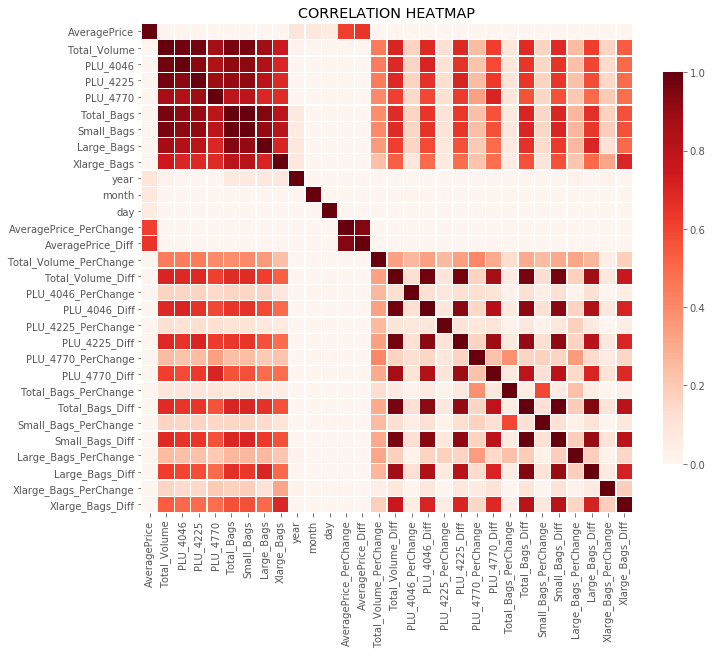

In [41]:
# Creating a heatmap to visualize the correlations of each feature to home runs (b_home_run) 
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(avocado_data.corr(),cmap="Reds",annot=False ,vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
# title
title = 'Correlation Heatmap'.upper()
plt.title(title)
plt.show()

# Forcasting with Prohet

In [ ]:
# source: https://facebook.github.io/prophet/docs/quick_start.html

### Forcasting USA Avocado Prices by Region

In [43]:
avocado_data['area'].value_counts()

East         7098
MidWest      4732
West         4729
South         676
USA           338
Midsouth      338
Northeast     338
Name: area, dtype: int64

In [44]:
"""Selecting the East, MidWest, and West to forcast"""

'Selecting the East, MidWest, and West to forcast'

In [93]:
avocado_price_forcasting_east = area_selection(avocado_data, 'East')
avocado_price_forcasting_west = area_selection(avocado_data, 'West')
avocado_price_forcasting_midwest = area_selection(avocado_data, 'MidWest')

In [94]:
avocado_price_forcasting_east =  avocado_price_forcasting_east.replace([np.inf, -np.inf], np.nan).fillna(0)
avocado_price_forcasting_west = avocado_price_forcasting_west.replace([np.inf, -np.inf], np.nan).fillna(0)
avocado_price_forcasting_midwest = avocado_price_forcasting_midwest.replace([np.inf, -np.inf], np.nan).fillna(0)

In [181]:
# source: https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb
from calendar import day_abbr, month_abbr, mdays
import holidays

In [195]:
holidays_df = pd.DataFrame([], columns = ['ds','holiday'])

In [196]:
dates, names = list(), list()

for date, name in sorted(holidays.USA(years= np.arange(2015,2018+1)).items()):
    
    dates.append(date)
    names.append(name)

In [215]:
holidays_df.loc[:,'ds'] = dates
holidays_df.loc[:,'holiday'] = names

In [216]:
holidays_df.loc[:,'holiday'] = holidays_df.loc[:,'holiday'].apply(lambda x : x.replace(' (Observed)',''))
holidays_df.holiday.unique()

array(["New Year's Day", 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving',
       'Christmas Day'], dtype=object)

In [156]:
avocado_price_forcasting_east_grp = avocado_price_forcasting_east.groupby('ds').mean()
avocado_price_forcasting_east_grp.reset_index(inplace=True)

avocado_price_forcasting_west_grp = avocado_price_forcasting_west.groupby('ds').mean()
avocado_price_forcasting_west_grp.reset_index(inplace=True)

avocado_price_forcasting_midwest_grp = avocado_price_forcasting_midwest.groupby('ds').mean()
avocado_price_forcasting_midwest_grp.reset_index(inplace=True)

In [246]:
# define the model
model_east = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, holidays= holidays_df)
model_west = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, holidays= holidays_df)
model_midwest = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, holidays= holidays_df)

# fit the model
model_east.fit(avocado_price_forcasting_east_grp)
model_west.fit(avocado_price_forcasting_west_grp)
model_midwest.fit(avocado_price_forcasting_midwest_grp)

C:\Users\ranih\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\ranih\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\ranih\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [247]:
future_east = model_east.make_future_dataframe(periods=365)
forecast_east = model_east.predict(future_east)

future_west = model_west.make_future_dataframe(periods=365)
forecast_west = model_west.predict(future_west)

future_midwest = model_midwest.make_future_dataframe(periods=365)
forecast_midwest = model_midwest.predict(future_midwest)

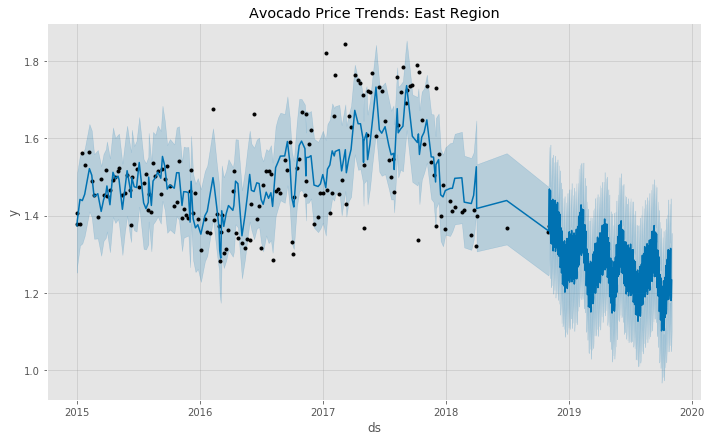

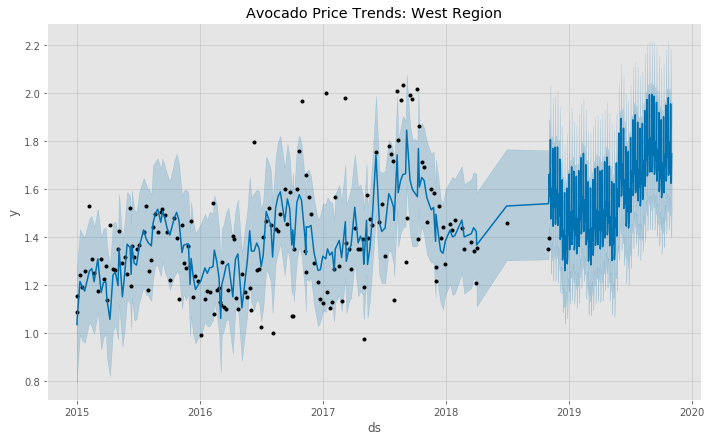

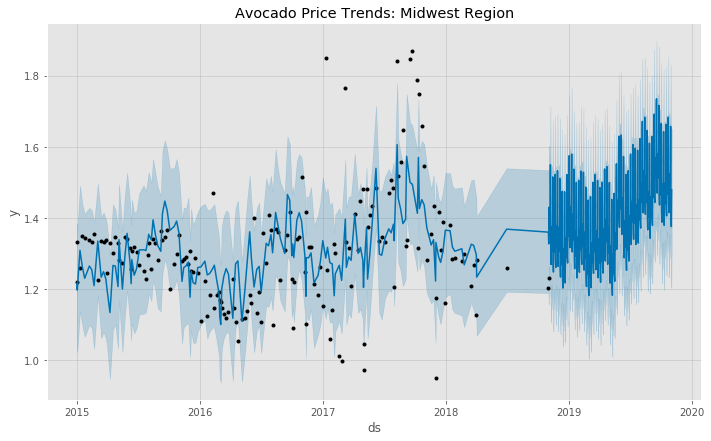

In [252]:
fig1_east = model_east.plot(forecast_east,uncertainty=True)
plt.title("Avocado Price Trends: East Region")

fig1_west = model_west.plot(forecast_west,uncertainty=True)
plt.title("Avocado Price Trends: West Region")

fig1_midwest = model_midwest.plot(forecast_midwest,uncertainty=True)
plt.title("Avocado Price Trends: Midwest Region")


plt.show()

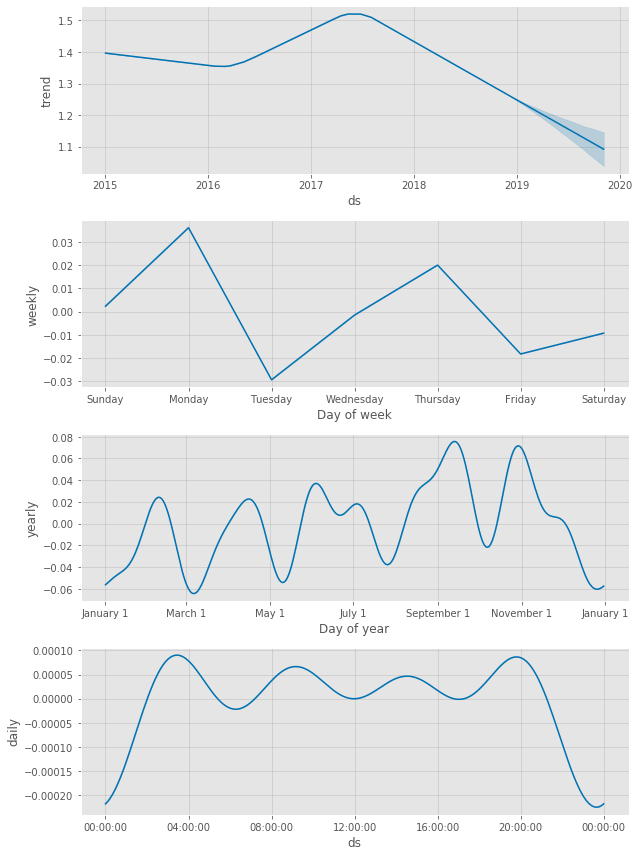

In [249]:
fig2_east = model.plot_components(forecast_east)

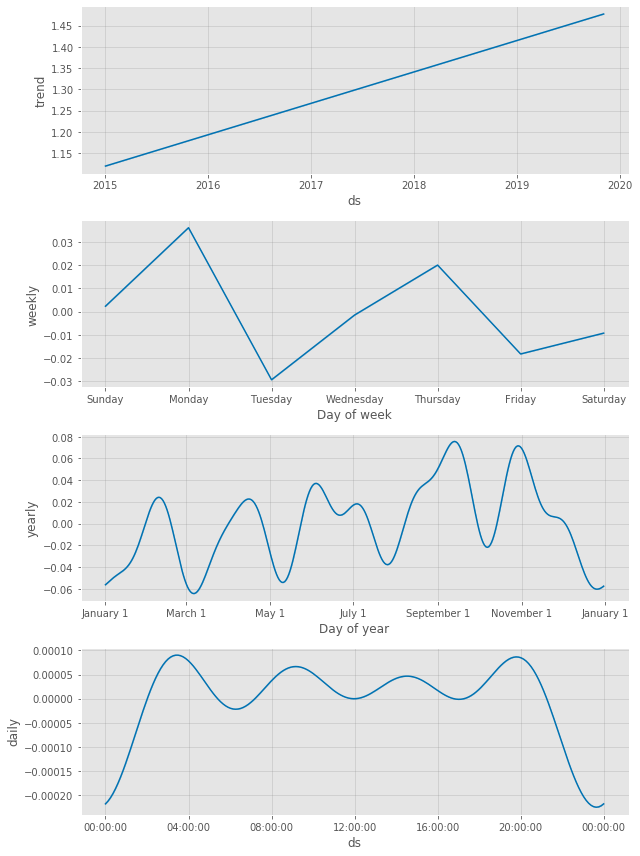

In [250]:
fig2_west = model.plot_components(forecast_west)

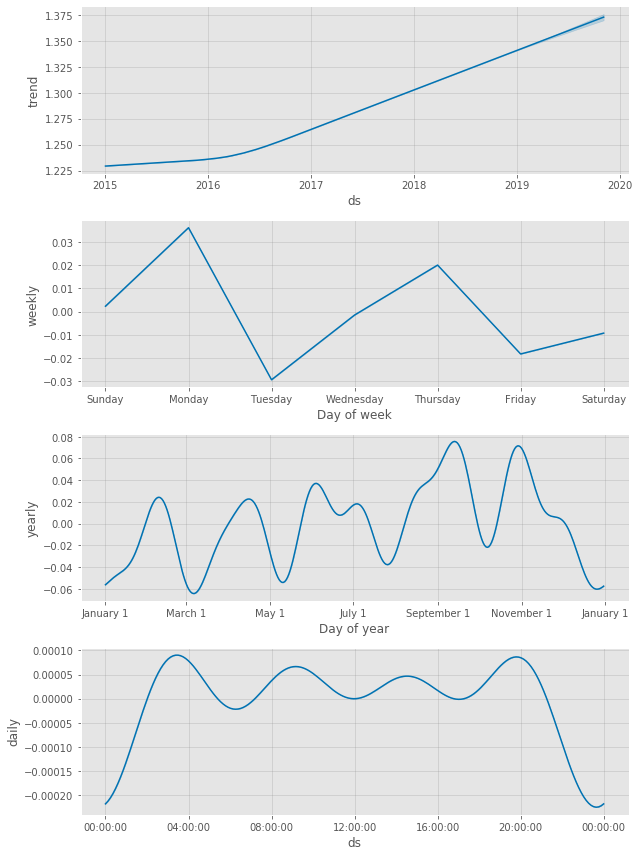

In [251]:
fig2_midwest = model.plot_components(forecast_midwest)